## Query Study on Worldwide Earthquakes within past 24 hours
### Note: To get recent earthquakes -> Click Cell --> Run All!
### Note: Results are below the code!

#### Goal
The goal of this project is to extract all earthquakes that have occured all over the world in real time and analyze the data with queries utilizing SQLite.

#### Data
The earthquake data is pulled from the USGS (link below). The USGS provides earthquake data in various feeds: past hour, past 24 hours, past 7 days, past 30 days. This project uses the past 24 hour feed, which is in GeoJSON format. 

#### Method
I created a function (get_recent_earthquakes) that takes the past 24 hour earthquake GeoJSON data and creates a Dataframe using some key properties of the earthquakes. In this study, I am primarily working with location and magnitude of earthquakes. 

After cleaning the dataframe, I created another function that maps the data (plot quakes).

Lastly, I created a function (query_earthquakes) that takes an SQLite query as input and returns the result. 

### Note: Results are below the code!

Website for GeoJSON earthquake files!
https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

In [31]:
#This function takes the GeoJSON file of all earthquakes within past 24 hours and puts data into a dataframe
def get_recent_earthquakes(earthquakes):
    data = earthquakes
    
    jsonresults = requests.get(data).json()
    
    earthquake_data = jsonresults['features']
    
    columns = ['mag','place','time','url','felt','alert','sig','event_type','latitude','longitude','ID']
    global earthquake_df
    earthquake_df = pd.DataFrame(columns = columns)
    
    
    for data in earthquake_data:
        mag = data['properties']['mag']
        place = data['properties']['place']
        time = data['properties']['time']
        url = data['properties']['url']
        felt = data['properties']['felt']
        alert = data['properties']['alert']
        sig = data['properties']['sig']
        event_type = data['properties']['type']
        latitude = data['geometry']['coordinates'][1]
        longitude = data['geometry']['coordinates'][0]
    
    #put into df
    
        earthquake_df = earthquake_df.append({'mag':mag,
                   'place':place,
                   'time':time,
                   'url':url,
                   'felt':felt,
                   'alert':alert,
                   'sig':sig,
                   'event_type':event_type,
                   'latitude':latitude,
                   'longitude':longitude},ignore_index = True)
    earthquake_df['place'] = earthquake_df['place'].str.split('of').str[1]
    earthquake_df['location'] = earthquake_df['place'].str.split(',').str[1]
    earthquake_df['location'] = earthquake_df['location'].str.replace('CA','California')
    earthquake_df['class'] = ['Minor' if x >-1 and x<4 else 
                           'Light' if x>=4 and x<5 else 
                           'Moderate' if x>=5 and x<6 else 
                           'Strong' if x>=6 and x<7 else
                           'Major' if x>=7 and x<8 else
                           'Great' for x in earthquake_df['mag']]
    #print('Within the past day, there have been {} earthquakes worldwide'.format(earthquake_df.shape[0]))
    return earthquake_df.head(10)
    

In [32]:
#This function plots all earthquakes within past 24 hours
def plot_quakes():
    lat = 48.049439
    long =-2.974767
    world_map = folium.Map(location = [lat,long],zoom_start = 2)
    
    # instantiate a feature group for the incidents in the dataframe
    #incidents = folium.map.FeatureGroup()

    # loop through df and add each to the incidents feature group
    for lat, lng, mag in zip(earthquake_dfs.latitude, earthquake_dfs.longitude,earthquake_dfs.mag):
        folium.Marker(location = [lat, lng],popup = str(mag),icon = folium.Icon(color = color(mag))).add_to(world_map)
                
        

    # add incidents to map and show
    display(world_map)

In [33]:
#This function takes a SQLite query and returns the results
def query_earthquakes(query):
    #refine earthquake dataframe
    global earthquake_dfs
    earthquake_dfs = earthquake_df.drop(columns = ['time','url','felt','alert','sig','event_type','ID'])
    earthquake_dfs['place'] = earthquake_df['place'].astype(str)
    earthquake_dfs['location'] = earthquake_dfs['location'].astype(str)
    #print query
    print(psql.sqldf(query,globals()))
    

In [34]:
#this function is to control the marker colors on the map so that the hotter colors are higher in magnitude
def color(mag):
    if mag in np.arange(0,1.0,0.01).round(decimals= 2):
        col = 'darkpurple'
    #elif mag in np.arange(0,1.0,0.1).round(decimals= 1):
        #col = 'purple'
    elif mag in np.arange(1,2.0,0.01).round(decimals= 2):
        col = 'blue'
   # elif mag in np.arange(1,2.0,0.1).round(decimals= 1):
       # col = 'blue'    
    elif mag in np.arange(2,3.0,0.01).round(decimals= 2):
        col = 'lightblue'
    #elif mag in np.arange(2,3.0,0.1).round(decimals= 1):
        #col = 'light blue'    
    elif mag in np.arange(3,4.0,0.01).round(decimals= 2):
        col = 'lightgreen'
    #elif mag in np.arange(3,4.0,0.1).round(decimals= 1):
        #col = 'light green'    
    elif mag in np.arange(4,5.0,0.01).round(decimals= 2):
        col = 'orange'
    #elif mag in np.arange(4,5.0,0.1).round(decimals= 1):
       # col = 'yellow'
    elif mag in np.arange(5,6.0,0.01).round(decimals= 2):
        col = 'lightred'
    #elif mag in np.arange(5,6.0,0.1).round(decimals= 1):
       # col = 'orange'
    else:
        col = 'red'    
    return col

----

### Run function to look at the 10 most recent earthquakes

In [35]:
get_recent_earthquakes('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson')

,mag,place,time,url,felt,alert,sig,event_type,latitude,longitude,ID,location,class
0,1.39,"The Geysers, CA",1578840410030,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,30,earthquake,38.811832,-122.830498,NaN,California,Minor
1,1.11,"Trona, CA",1578840393050,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,19,earthquake,35.527500,-117.371500,NaN,California,Minor
2,0.48,"Searles Valley, CA",1578839901440,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,4,earthquake,35.851333,-117.650167,NaN,California,Minor
3,1.00,"The Geysers, CA",1578839768990,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,15,earthquake,38.804833,-122.777496,NaN,California,Minor
4,1.98,"Volcano, Hawaii",1578838888440,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,60,earthquake,19.402000,-155.259506,NaN,Hawaii,Minor
5,1.89,"Volcano, Hawaii",1578838845520,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,55,earthquake,19.410334,-155.283997,NaN,Hawaii,Minor
6,2.20,"Ridgecrest, CA",1578838701930,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,74,earthquake,35.708500,-117.572000,NaN,California,Minor
7,2.13,"Pahala, Hawaii",1578838372920,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,70,earthquake,19.219166,-155.420166,NaN,Hawaii,Minor
8,2.90,"Guanica, Puerto Rico",1578837481630,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,129,earthquake,17.906500,-66.844500,NaN,Puerto Rico,Minor
9,2.00,"Kalifornsky, Alaska",1578837313018,https://earthquake.usgs.gov/earthquakes/eventp...,None,None,62,earthquake,60.414200,-151.733300,NaN,Alaska,Minor


---

# Queries of Earthquakes within past 24 hours

###  #1. How many earthquakes have there been around the world within the past 24 hours?

In [36]:
query_earthquakes("SELECT count(*) as Earthquakes_Last24Hours from earthquake_dfs")

   Earthquakes_Last24Hours
0                      221


---

###  #2. What location had the most recent earthquake and what was the earthquakes magnitude?

In [37]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs LIMIT 1;")

              place  Magnitude
0   The Geysers, CA       1.39


---

###  #3. Top 5 locations with most earthquakes in past 24 hours

In [38]:
query_earthquakes("SELECT location,count(place) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC LIMIT 5")

       location  Total_Quakes
0    California           108
1        Alaska            44
2   Puerto Rico            21
3        Hawaii            16
4      Oklahoma             7


---

###  #4. All earthquakes that occured in Hawaii past 24 hours

In [47]:
query_earthquakes("SELECT place,mag as magnitude,latitude,longitude FROM earthquake_dfs WHERE location LIKE '%Hawaii%'")

                  place  magnitude   latitude   longitude
0       Volcano, Hawaii       1.98  19.402000 -155.259506
1       Volcano, Hawaii       1.89  19.410334 -155.283997
2        Pahala, Hawaii       2.13  19.219166 -155.420166
3       Volcano, Hawaii       1.82  19.456333 -155.328507
4       Volcano, Hawaii       2.70  19.417999 -155.282165
5       Volcano, Hawaii       2.44  19.417334 -155.296661
6        Pahala, Hawaii       2.61  19.009832 -155.417007
7        Pahala, Hawaii       2.00  19.224501 -155.462326
8      Honoka'a, Hawaii       2.75  19.948999 -155.522659
9       Volcano, Hawaii       2.09  19.419001 -155.279495
10       Pahala, Hawaii       2.08  19.173166 -155.472839
11       Pahala, Hawaii       2.02  19.221167 -155.414337
12   Fern Acres, Hawaii       1.76  19.367001 -155.089004
13       Pahala, Hawaii       1.70  19.176834 -155.424499
14       Pahala, Hawaii       1.90  19.181999 -155.445160
15       Pahala, Hawaii       2.88  19.221666 -155.403503


---

###  #5. Compute average magnitude and total count for each location that had an earthquake

In [40]:
query_earthquakes("SELECT location, avg(mag) as Avg_Magnitude,count(location) as Total_Quakes FROM earthquake_dfs GROUP BY location ORDER BY count(location) DESC")

             location  Avg_Magnitude  Total_Quakes
0          California       1.146667           108
1              Alaska       1.700000            44
2         Puerto Rico       3.731429            21
3              Hawaii       2.171875            16
4            Oklahoma       2.125714             7
5          Washington       1.263333             3
6                 nan       3.433333             3
7                B.C.       2.700000             2
8               Chile       4.300000             2
9              Nevada       1.250000             2
10           Pakistan       4.550000             2
11   Papua New Guinea       4.900000             2
12      Bouvet Island       5.600000             1
13         East Timor       4.500000             1
14             Greece       4.300000             1
15          Indonesia       4.900000             1
16               Iran       4.200000             1
17             Mexico       4.300000             1
18           Missouri       1.9

###  #6. Compute percentage of earthquakes that occured in California

In [41]:
q3 = """SELECT location,
round(count(case when location LIKE '%California%' then 1 end)*1.0 / count(*),2)*100 as 'percentage(%)' FROM earthquake_dfs
"""

query_earthquakes(q3)

      location  percentage(%)
0   California           49.0


---

###  #7. Location with at least 5 earthquakes with average and maximum magnitudes

In [42]:
query_earthquakes("SELECT location,count(place) as Total_Quakes, avg(mag) as Average_Magnitude,max(mag) as Maximum_Magnitude FROM earthquake_dfs GROUP BY location HAVING count(place) >4.999")

       location  Total_Quakes  Average_Magnitude  Maximum_Magnitude
0        Alaska            44           1.700000               4.40
1    California           108           1.146667               2.84
2        Hawaii            16           2.171875               2.88
3      Oklahoma             7           2.125714               2.30
4   Puerto Rico            21           3.731429               4.90


---

Let's look at the earthquake magnitude classes according to Michigan Tech University (http://www.geo.mtu.edu/UPSeis/magnitude.html)

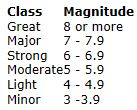

###  #8. Were there any locations that had a 'Strong' earthquake? If so, how many and what places?

In [43]:
query_earthquakes("SELECT place,mag as Magnitude FROM earthquake_dfs WHERE mag > 5.999")

                  

Empty DataFrame
Columns: [place, Magnitude]
Index: []


---

###  #9. Count of earthquake class per location

In [44]:
q = """SELECT location, 
sum(case when class = 'Minor' then 1 else 0 end) Minor,
sum(case when class = 'Light' then 1 else 0 end) Light,
sum(case when class = 'Moderate' then 1 else 0 end) Moderate,
sum(case when class = 'Strong' then 1 else 0 end) Strong,
sum(case when class = 'Major' then 1 else 0 end) Major,
sum(case when class = 'Great' then 1 else 0 end) Great
FROM earthquake_dfs GROUP BY location
"""
query_earthquakes(q)

             location  Minor  Light  Moderate  Strong  Major  Great
0              Alaska     43      1         0       0      0      0
1                B.C.      2      0         0       0      0      0
2       Bouvet Island      0      0         1       0      0      0
3          California    108      0         0       0      0      0
4               Chile      0      2         0       0      0      0
5          East Timor      0      1         0       0      0      0
6              Greece      0      1         0       0      0      0
7              Hawaii     16      0         0       0      0      0
8           Indonesia      0      1         0       0      0      0
9                Iran      0      1         0       0      0      0
10             Mexico      0      1         0       0      0      0
11           Missouri      1      0         0       0      0      0
12             Nevada      2      0         0       0      0      0
13           Oklahoma      7      0         0   

---

###  #10. All Earthquakes Per Class

In [45]:
query_earthquakes("SELECT class, count(class) FROM earthquake_dfs GROUP BY class")

      class  count(class)
0     Light            20
1     Minor           198
2  Moderate             3


---

### Run function to plot earthquakes
**Color Scale:**

0-1 Magnitude: Dark Purple 

1-2 Magnitude: Blue

2-3 Magnitude: Light Blue

3-4 Magnitude: Light Green

4-5 Magnitude: Orange

5-6 Magnitude: Light Red

6+ Magnitude: Red

In [46]:
plot_quakes()